In [1]:
!pip install -U tensorflow_datasets

In [4]:
import tensorflow as tf

In [5]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import math
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

#tf.enable_eager_execution()

2.15.0


In [7]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised = True, with_info = True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [16]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print(num_train_examples)
print(num_test_examples)

60000
10000


In [10]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

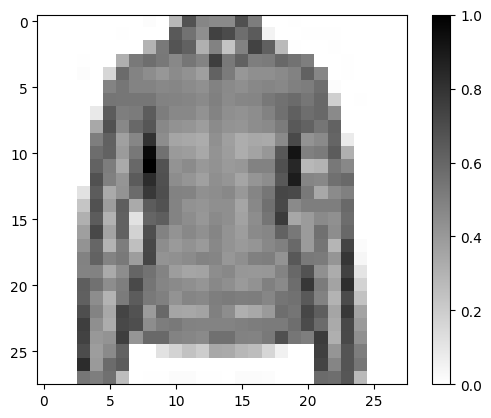

In [17]:
for image, labels in test_dataset.take(1):
  break
image = image.numpy().reshape((28, 28))
plt.figure()
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

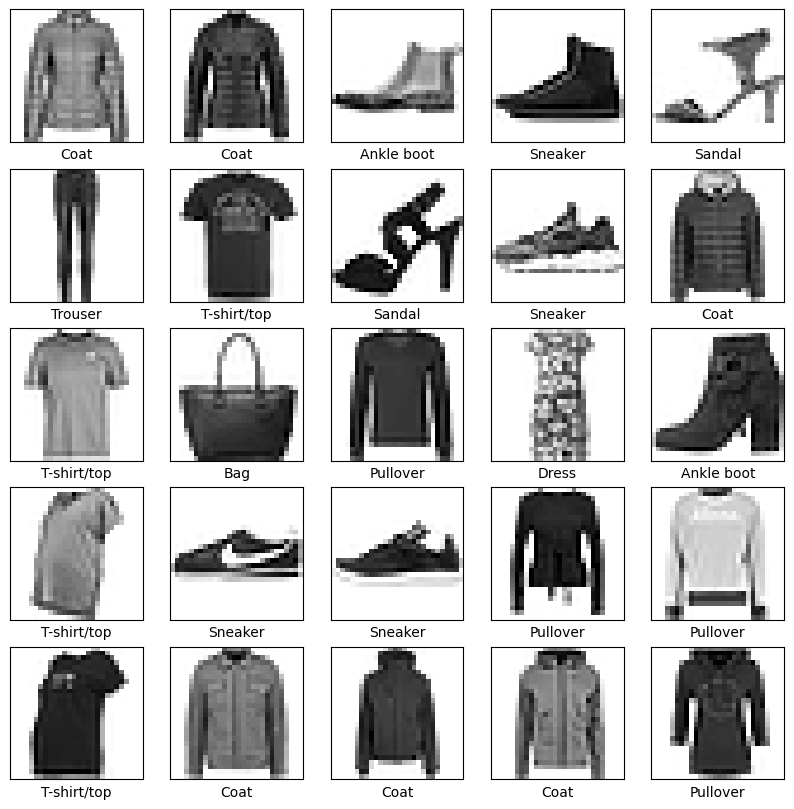

In [18]:
plt.figure(figsize = (10, 10))
i = 0
for (image, label) in test_dataset.take(25):
  image = image.numpy().reshape((28, 28))
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap = plt.cm.binary)
  plt.xlabel(class_names[label])
  i += 1
plt.show()

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28, 1)),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [20]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [21]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [23]:
model.fit(train_dataset, epochs = 5, steps_per_epoch = math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 16s 4ms/step - loss: 0.4942 - accuracy: 0.8260
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3658 - accuracy: 0.8677
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3345 - accuracy: 0.8775
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3129 - accuracy: 0.8854
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2916 - accuracy: 0.8922


In [25]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps = math.ceil(num_test_examples/32))
print("Accuracy of the test dataset", test_accuracy)

313/313 [==============================] - 3s 8ms/step - loss: 0.3543 - accuracy: 0.8728
Accuracy of the test dataset 0.8727999925613403


In [26]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

1/1 [==============================] - 0s 125ms/step


In [27]:
predictions.shape

(32, 10)

In [28]:
predictions[0]

array([3.9228613e-05, 5.0742337e-06, 1.0567209e-02, 9.7906404e-06,
       9.5926750e-01, 5.4454490e-09, 3.0107182e-02, 4.7821139e-08,
       3.9870292e-06, 5.1803720e-08], dtype=float32)

In [31]:
np.argmax(predictions[0])

4

In [32]:
test_labels[0]

4

In [33]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

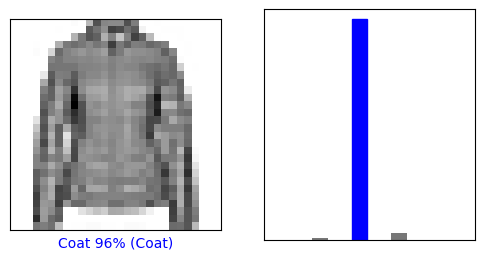

In [35]:
i = 0
plt.figure(figsize = (6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

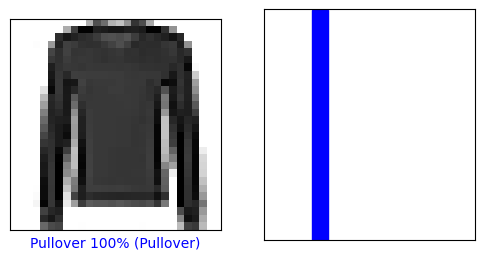

In [36]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

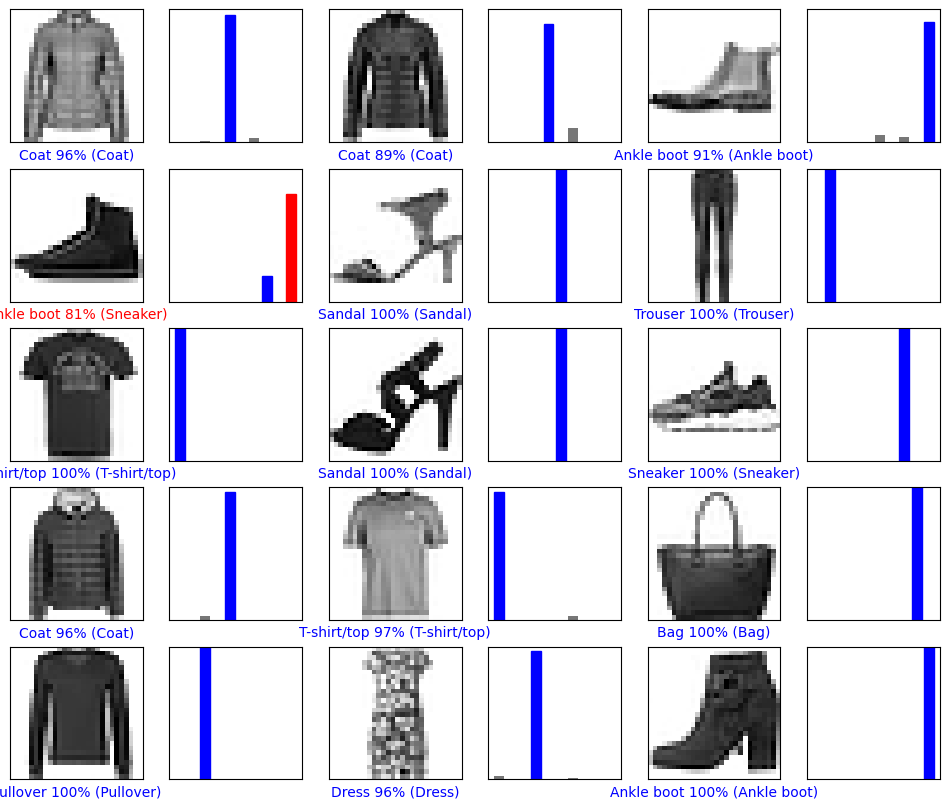

In [37]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [38]:
img = test_images[0]
print(img.shape)

(28, 28, 1)


In [39]:
img = np.array([img])
print(img.shape)

(1, 28, 28, 1)


In [41]:
predictions_simple = model.predict(img)
print(predictions_simple)

1/1 [==============================] - 0s 27ms/step
[[3.92286129e-05 5.07422374e-06 1.05671985e-02 9.79062133e-06
  9.59267497e-01 5.44544898e-09 3.01071685e-02 4.78210467e-08
  3.98702923e-06 5.18037204e-08]]


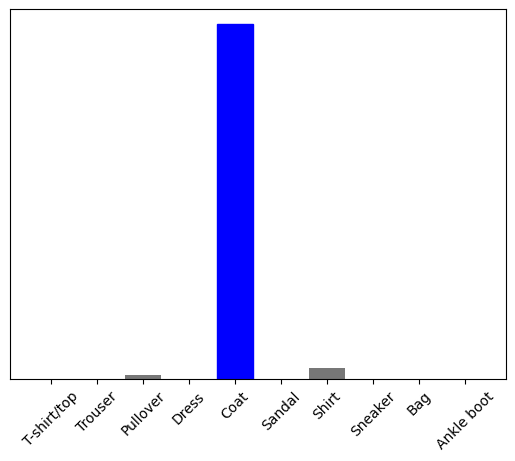

In [42]:
plot_value_array(0, predictions_simple, test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)

In [43]:
np.argmax(predictions_simple[0])

4